In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data_numericals = data.select_dtypes(include = np.number)
data_categoricals = data.select_dtypes("object")

In [ ]:
# 1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts().

In [ ]:
def countplot(data_categoricals):
    for column in data_categoricals.columns:
        if data_categoricals[column].nunique() < 6:
            sns.countplot(x=column, data=data_categoricals, order=data_categoricals[column].value_counts().index)
            plt.show()
        else:
            sns.countplot(y=column, data=data_categoricals, order=data_categoricals[column].value_counts().index)
            plt.show()

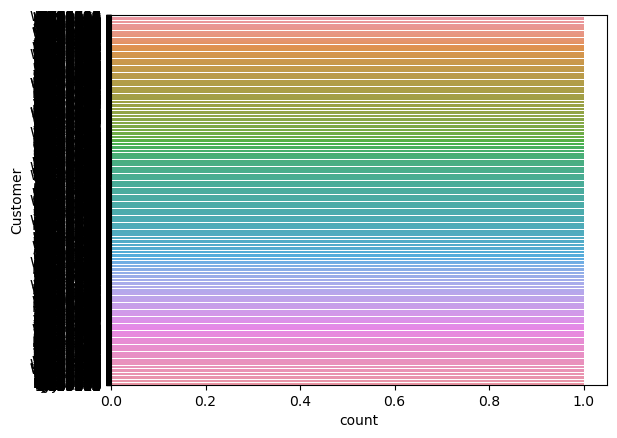

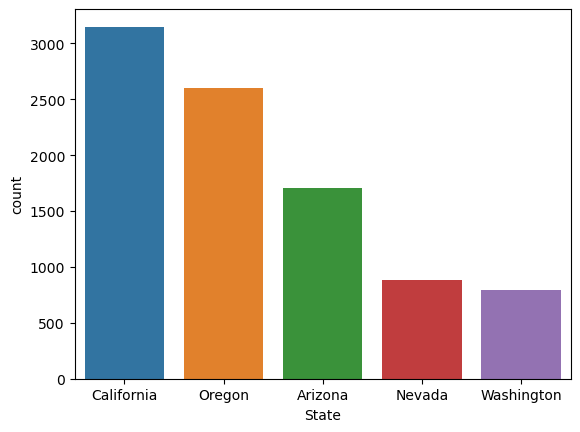

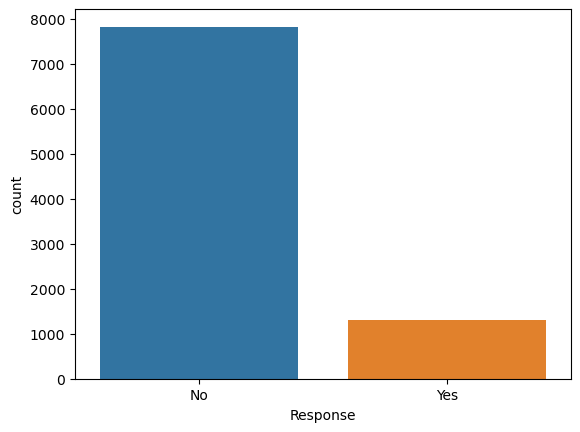

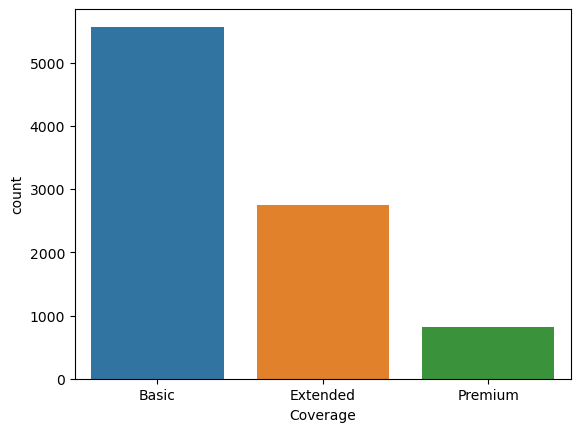

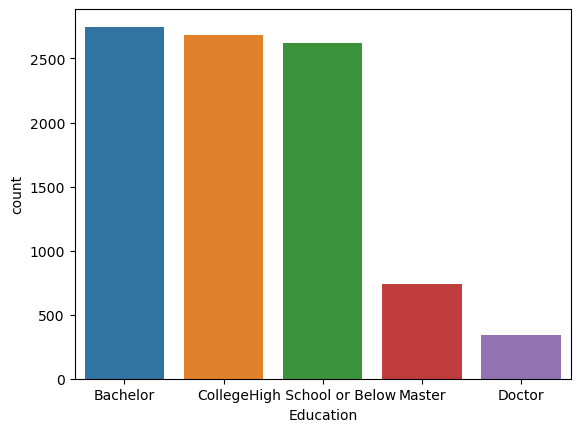

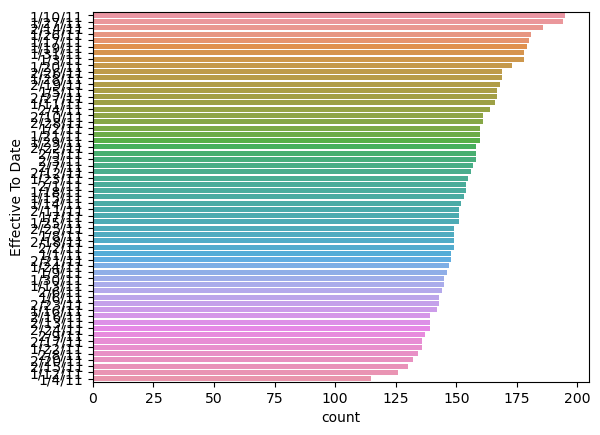

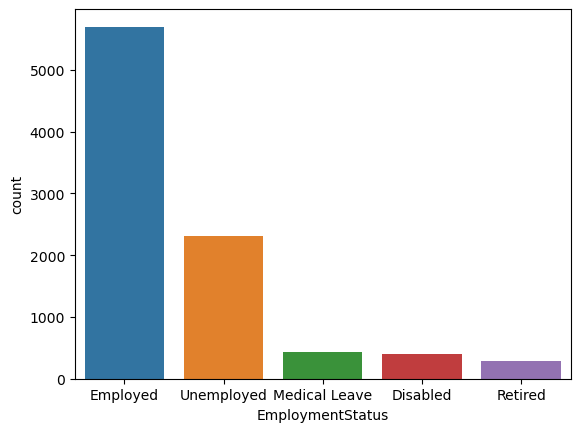

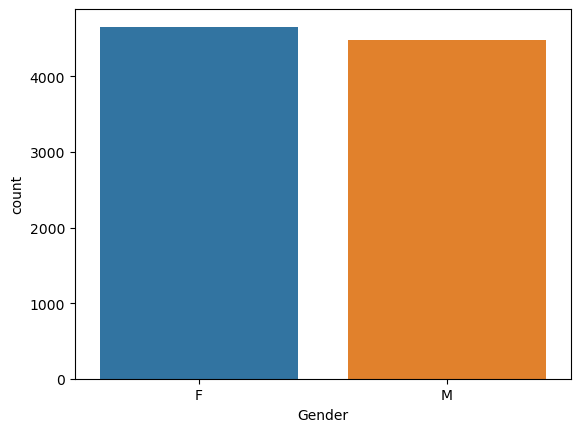

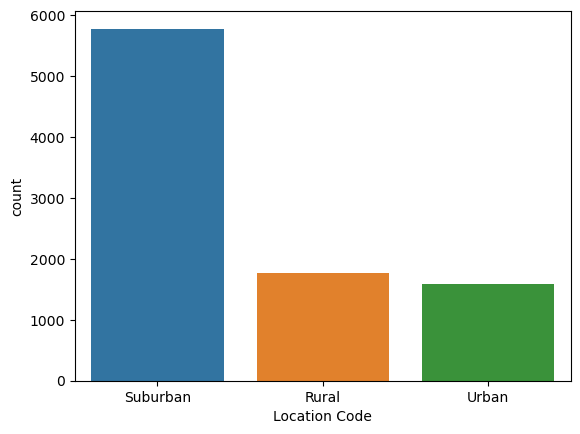

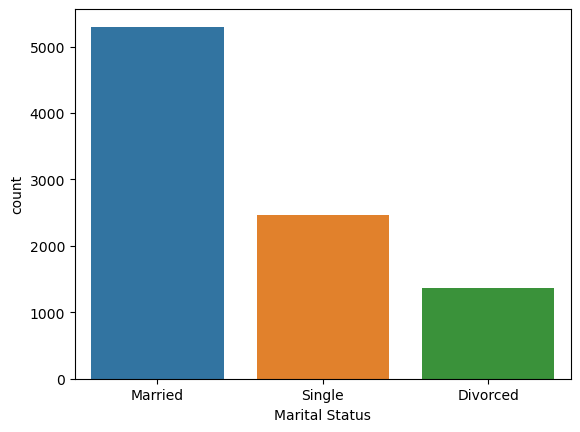

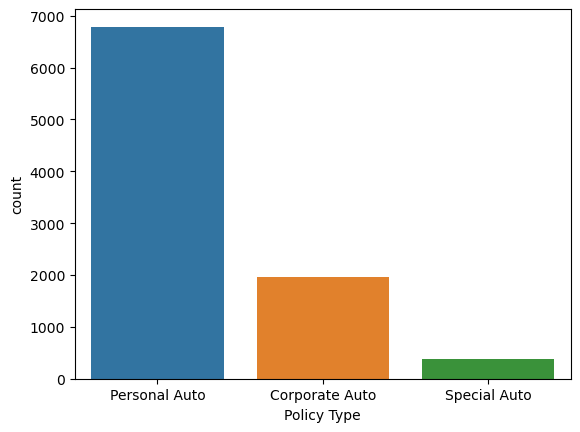

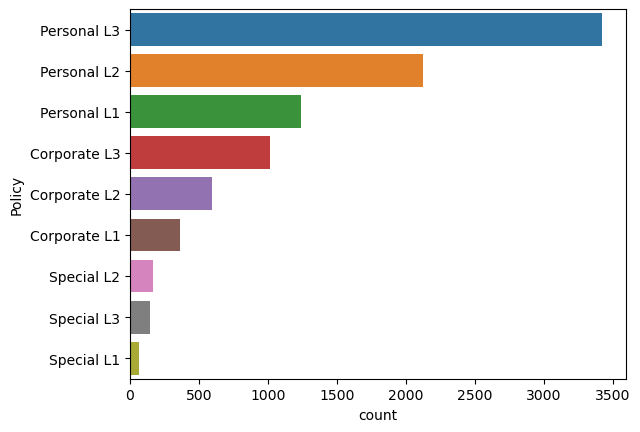

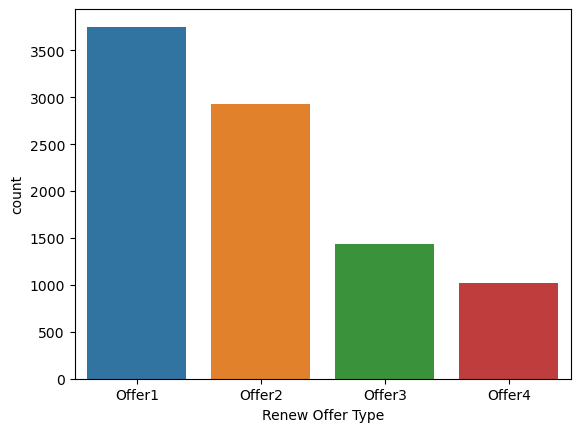

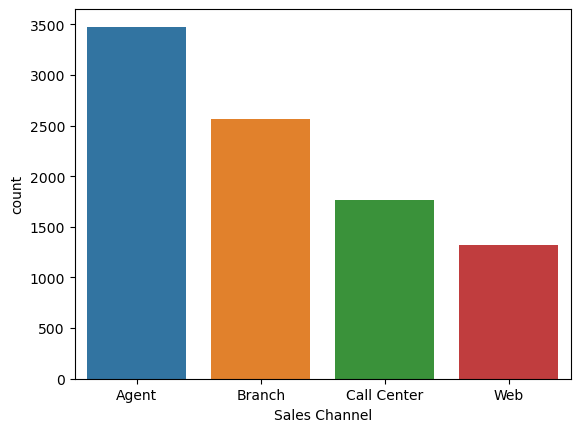

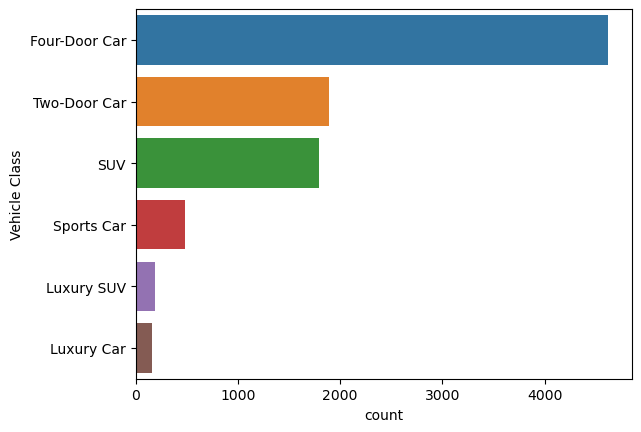

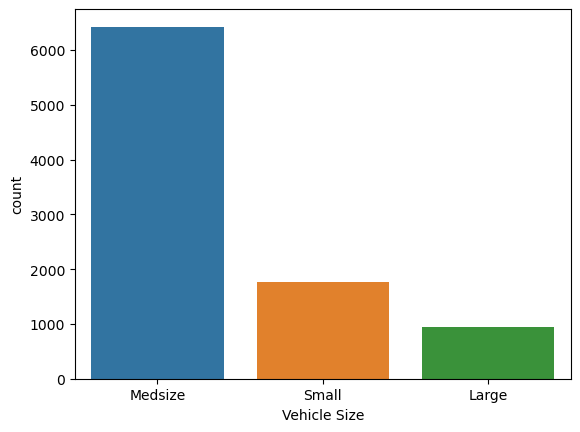

In [5]:
countplot(data_categoricals) 

In [ ]:
# 2. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [6]:
def transform_policy_column(data_categoricals):
    data_categoricals = data_categoricals.drop("Policy Type", axis=1)
    data_categoricals["Policy"] = data_categoricals["Policy"].apply(lambda x: "L1" if x == 1 else ("L2" if x == 2 else "L3"))
    return data_categoricals

In [7]:
data_categoricals.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
data_categoricals1 = transform_policy_column(data_categoricals)

data_categoricals1.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,L3,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,L3,Offer1,Agent,Four-Door Car,Medsize


In [ ]:
# 3. Time dependency analysis. Use a seaborn lineplot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

In [9]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

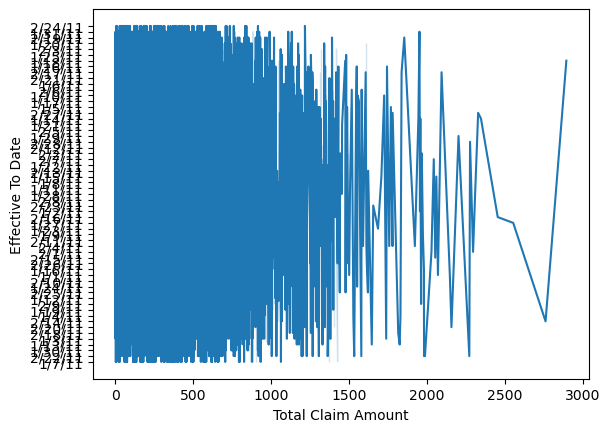

In [10]:
sns.lineplot(y=data['Effective To Date'], x= data['Total Claim Amount'], data=data)
plt.show()

In [ ]:
# 4. Define an empty Pandas DataFrame and add columns- day with the day number of effective_to_date, day_name with the day NAME of effective_to_date, week with the week of effective_to_date, month with the month NAME of effective_to_date, total_claim_amount with total_claim_amount

In [11]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

In [12]:
df4 = pd.DataFrame() 

df4['day'] = data['Effective To Date'].dt.day
df4['day_name'] = data['Effective To Date'].dt.day_name()
df4['week'] = data['Effective To Date'].dt.week
df4['month'] = data['Effective To Date'].dt.month_name()
df4['total_claim_amount'] = data['Total Claim Amount']

/var/folders/zh/vb5lf3750v95681z25hzkm9c0000gn/T/ipykernel_65286/4129090735.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df4['week'] = data['Effective To Date'].dt.week


In [13]:
display(df4)

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


In [ ]:
# 5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [14]:
df4.columns

Index(['day', 'day_name', 'week', 'month', 'total_claim_amount'], dtype='object')

In [15]:
target = df4.groupby('day_name')['total_claim_amount'].sum()
target_rounded = target.round(2)
correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
result = target_rounded.reindex(index=correct_days)

In [16]:
result

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

In [ ]:
# 6. Use a seaborn lineplot to plot the previous series. Do you see some differences by day of the week?

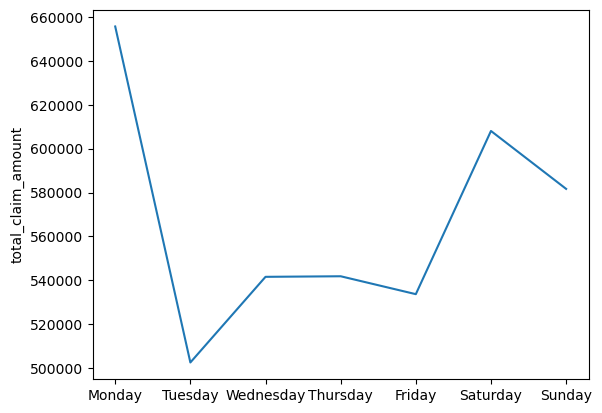

In [17]:
sns.lineplot(y=result, x= correct_days, data=result)
plt.show()

In [ ]:
# 7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [18]:
result = pd.DataFrame(result)

display(result)

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


In [19]:
day_name_total = result.groupby('day_name')['total_claim_amount'].sum()
list_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
result7 = day_name_total.reindex(index=correct_days) 

In [20]:
result7

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

In [ ]:
# 8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [21]:
result7 = pd.DataFrame(result7)

In [22]:
grouped = result7.groupby('day_name')
median = grouped['total_claim_amount'].median()
sorted_median_8 = median.sort_values(ascending=False)

In [23]:
sorted_median_8

day_name
Monday       655689.71
Saturday     608060.10
Sunday       581655.66
Thursday     541820.80
Wednesday    541563.05
Friday       533658.79
Tuesday      502518.93
Name: total_claim_amount, dtype: float64

In [ ]:
# 9. Plot the median "target" by day of the week name using a seaborn barplot

In [24]:
sorted_median = pd.DataFrame(sorted_median_8)

In [25]:
sorted_median.columns

Index(['total_claim_amount'], dtype='object')

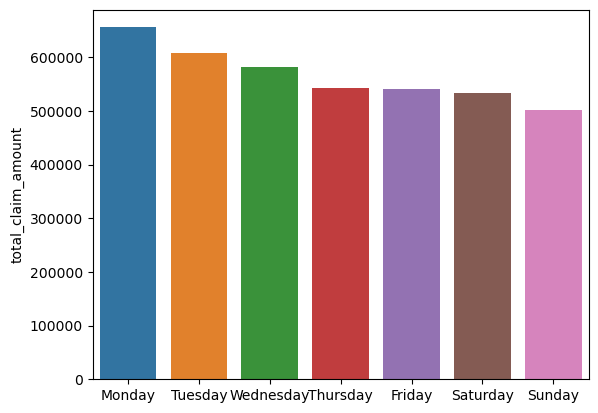

In [26]:
sns.barplot(y=sorted_median['total_claim_amount'], x=list_correct_days, data=sorted_median)
plt.show()

In [ ]:
# 10. What do you can conclude from this analysis?

# Per the distribution of the barplot, the total_claim_amount tends to be much higher at the start of the week, gradually descending over the duration of the week

In [ ]:
# 11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [27]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6, 
    'July': 7, 
    'August': 8, 
    'September': 9, 
    'October': 10, 
    'November': 11, 
    'December': 12
}

df4['month_number'] = df4['month'].map(month_mapping) 

In [28]:
df4

,day,day_name,week,month,total_claim_amount,month_number
0,24,Thursday,8,February,384.811147,2
1,31,Monday,5,January,1131.464935,1
2,19,Saturday,7,February,566.472247,2
3,20,Thursday,3,January,529.881344,1
4,3,Thursday,5,February,138.130879,2
...,...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764,2
9130,12,Saturday,6,February,379.200000,2
9131,6,Sunday,5,February,790.784983,2
9132,3,Thursday,5,February,691.200000,2


In [29]:
target = df4.groupby('month_number')['total_claim_amount'].sum()
target_rounded = target.round(2)
correct_month = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
result11 = target_rounded.reindex(index=correct_month)

In [30]:
result11

month_number
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
Name: total_claim_amount, dtype: float64

In [ ]:
# 12. Can you do a monthly analysis given the output of the previous series? Why? 
# For whatever reason it does not work and I am not sure why

In [31]:
data_numericals.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [ ]:
# 13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [32]:
data_numericals = pd.DataFrame(data_numericals)

In [33]:
numerical_continuous = data_numericals.drop(["Months Since Last Claim", "Months Since Policy Inception", "Number of Open Complaints", "Number of Policies"], axis = 1)

In [34]:
display(numerical_continuous)

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


In [35]:
def remove_outliers(data, thr=3):
    for column in data.columns:
        mean = data[column].mean()
        std = data[column].std()
        lower_bound = mean - thr * std
        upper_bound = mean + thr * std
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [ ]:
# 14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [36]:
continuous_clean_df = remove_outliers(numerical_continuous, thr=3)

display(continuous_clean_df)

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


In [ ]:
# 15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df and the relevant column of time_df. 

In [38]:
data_numericals.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [37]:
discrete_df = data_numericals.drop(columns=["Customer Lifetime Value", "Income", "Monthly Premium Auto", "Total Claim Amount"])

In [39]:
df15 = pd.concat([continuous_clean_df, discrete_df, data_categoricals1, df4['total_claim_amount']], axis=1)

display(df15)

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Customer,State,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,total_claim_amount
0,2763.519279,56274.0,69.0,384.811147,32,5,0,1,BU79786,Washington,...,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,6979.535903,0.0,94.0,1131.464935,13,42,0,8,QZ44356,Arizona,...,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,12887.431650,48767.0,108.0,566.472247,18,38,0,2,AI49188,Nevada,...,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,7645.861827,0.0,106.0,529.881344,18,65,0,7,WW63253,California,...,Unemployed,M,Suburban,Married,L3,Offer1,Call Center,SUV,Medsize,529.881344
4,2813.692575,43836.0,73.0,138.130879,12,44,0,1,HB64268,Washington,...,Employed,M,Rural,Single,L3,Offer1,Agent,Four-Door Car,Medsize,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9097,NaN,NaN,NaN,NaN,15,7,0,2,SR41132,California,...,Unemployed,F,Suburban,Single,L3,Offer4,Branch,Two-Door Car,Small,848.737364
9103,NaN,NaN,NaN,NaN,24,1,0,4,CZ57208,California,...,Employed,F,Suburban,Single,L3,Offer1,Agent,Luxury SUV,Large,1329.957905
9109,NaN,NaN,NaN,NaN,23,52,0,1,JR41742,California,...,Unemployed,M,Suburban,Single,L3,Offer1,Branch,SUV,Medsize,1254.177129
9110,NaN,NaN,NaN,NaN,10,59,0,2,RA89822,California,...,Employed,F,Suburban,Married,L3,Offer2,Agent,Sports Car,Medsize,523.200000


In [ ]:
# 16. Concatenate the continuous_cleaned_df, discrete_df, categorical_df and the relevant column of time_df. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [40]:
df16 = df15.dropna().reset_index()

display(df16)

,index,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Customer,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,total_claim_amount
0,0,2763.519279,56274.0,69.0,384.811147,32,5,0,1,BU79786,...,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,1,6979.535903,0.0,94.0,1131.464935,13,42,0,8,QZ44356,...,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,2,12887.431650,48767.0,108.0,566.472247,18,38,0,2,AI49188,...,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,3,7645.861827,0.0,106.0,529.881344,18,65,0,7,WW63253,...,Unemployed,M,Suburban,Married,L3,Offer1,Call Center,SUV,Medsize,529.881344
4,4,2813.692575,43836.0,73.0,138.130879,12,44,0,1,HB64268,...,Employed,M,Rural,Single,L3,Offer1,Agent,Four-Door Car,Medsize,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,9129,23405.987980,71941.0,73.0,198.234764,18,89,0,2,LA72316,...,Employed,M,Urban,Married,L3,Offer2,Web,Four-Door Car,Medsize,198.234764
8571,9130,3096.511217,21604.0,79.0,379.200000,14,28,0,1,PK87824,...,Employed,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,379.200000
8572,9131,8163.890428,0.0,85.0,790.784983,9,37,3,2,TD14365,...,Unemployed,M,Suburban,Single,L3,Offer1,Branch,Four-Door Car,Medsize,790.784983
8573,9132,7524.442436,21941.0,96.0,691.200000,34,3,0,3,UP19263,...,Employed,M,Suburban,Married,L3,Offer3,Branch,Four-Door Car,Large,691.200000


In [ ]:
# 17. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [41]:
cols = list(df16.columns)
cols.remove('Total Claim Amount')
cols.append('Total Claim Amount')

df17 = df16[cols]

In [ ]:
# 18. Turn the response column values into (Yes=1/No=0).

In [42]:
df17.columns

Index(['index', 'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Customer', 'State',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class',
       'Vehicle Size', 'total_claim_amount', 'Total Claim Amount'],
      dtype='object')

In [43]:
df17['Response'] = df17['Response'].map({'Yes': 1, 'No': 0}) 

In [44]:
display(df17['Response'])

0       0
1       0
2       0
3       0
4       0
       ..
8570    0
8571    1
8572    0
8573    0
8574    0
Name: Response, Length: 8575, dtype: int64

In [ ]:
# 19. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

In [45]:
df17["Education"] = df17["Education"].apply(lambda x: "Graduate" if x in ["Master", "Doctor"] else x)

In [46]:
df17.head()

,index,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Customer,State,...,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,total_claim_amount,Total Claim Amount
0,0,2763.519279,56274.0,69.0,32,5,0,1,BU79786,Washington,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,384.811147,384.811147
1,1,6979.535903,0.0,94.0,13,42,0,8,QZ44356,Arizona,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935,1131.464935
2,2,12887.431650,48767.0,108.0,18,38,0,2,AI49188,Nevada,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,566.472247,566.472247
3,3,7645.861827,0.0,106.0,18,65,0,7,WW63253,California,...,M,Suburban,Married,L3,Offer1,Call Center,SUV,Medsize,529.881344,529.881344
4,4,2813.692575,43836.0,73.0,12,44,0,1,HB64268,Washington,...,M,Rural,Single,L3,Offer1,Agent,Four-Door Car,Medsize,138.130879,138.130879


In [ ]:
# 20. Reduce the class imbalance of employmentstatus grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are.

In [47]:
df17["EmploymentStatus"] = df17["EmploymentStatus"].apply(lambda x: "Inactive" if x in ["Medical Leave", "Disabled", "Retired"] else x)

In [ ]:
# 21. Deal with column Gender turning the values into (1/0).

In [48]:
df17['Gender'] = df17['Gender'].map({'M': 1, 'F': 0})

In [ ]:
# 22. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", "Luxury Car" into a commoun group called Luxury leaving the other values as they are.

In [49]:
df17['Vehicle Class'] = df17['Vehicle Class'].apply(lambda x: "Luxury" if x in ["Sports Car", "Luxury SUV", "Luxury Car"] else x)

In [ ]:
# 23. Now it's time to deal with the categorical ordinal columns, asigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [51]:
coverage_mapping = {
    "Premium": 3,
    "Extended": 2,
    "Basic": 1
}

df17["Coverage"] = df17["Coverage"].map(coverage_mapping)

In [ ]:
# 24. Encode employmentstatus: "Employed" > "Inactive" > "Unemployed".

In [52]:
employment_mapping = {
    "Employed": 3, 
    "Inactive": 2, 
    "Unemployed": 1
}

df17["EmploymentStatus"] = df17["EmploymentStatus"].map(employment_mapping) 

In [ ]:
# 25. Encode location code: "Urban" > "Suburban" > "Rural".

In [53]:
location_mapping = {
    "Urban": 3, 
    "Suburban": 2, 
    "Rural": 1
}

df17["Location Code"] = df17["Location Code"].map(location_mapping)

In [ ]:
# 26. Encode vehicle size: "Large" > "Medsize" > "Small".

In [54]:
vehicle_mapping = {
    "Large": 3, 
    "Medsize": 2, 
    "Small": 1
} 

df17["Vehicle Size"] = df17["Vehicle Size"].map(vehicle_mapping)

In [ ]:
# 27. Get a dataframe with the categorical nominal columns

In [55]:
categorical_nominal = data.select_dtypes(include=["object"])

cat_nom = pd.DataFrame(categorical_nominal)

In [56]:
display(cat_nom)

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [ ]:
# 28. Create a list named levels which has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column

In [57]:
levels = []
for col in df17.columns:
    if df17[col].dtype == 'object':
        levels.append(df17[col].unique().tolist())

In [ ]:
# 29. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [58]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories=levels)

cat_nom_encoded = pd.DataFrame(encoder.fit_transform(cat_nom).toarray(), columns=encoder.get_feature_names(cat_nom))
cat_nom_encoded.index = cat_nom.index


ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).